In [1]:
from nn import NeuralNetwork, LayerDense
import numpy as np
from utils import standard_scaler, train_test_split, to_categorical, make_blobs
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from nn_extractor import NeuralNetworkExtractor
import os

# Test evaluation loss, accuracy

In [5]:
(_, _), (test_images, test_labels) = mnist.load_data()


test_labels = to_categorical(test_labels)

# Converts 0-255 values to 0-1
test_images = test_images / 255.0


print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

Test images shape: (10000, 28, 28)
Test labels shape: (10000, 10)


# Load saved layers to model

In [17]:
MODELS_PATH = './models/'
MODELS = os.listdir(MODELS_PATH)
print(MODELS)

['mnist_0.01_80_50_57000.pkl', 'mnist_0.03_10_250_54000.pkl', 'mnist_datagen&morph_augmented_0.01_80_50_96330.pkl', 'mnist_datagen_augmented_0.01_80_50_74100.pkl', 'mnist_morph_augmented_0.01_80_50_74100.pkl']


In [15]:
model_index = 4
path = f'{MODELS_PATH}{MODELS[model_index]}'

mlp_mnist = NeuralNetwork.load(path)

In [16]:
test_loss, test_acc = mlp_mnist.evaluate(test_images.reshape(-1, 784), test_labels)
print(f'Test size: {test_labels.shape}')
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

Test size: (10000, 10)
Test loss: 0.08136785658823925
Test accuracy: 0.9774


In [8]:
def show_25_pred(images, labels, predictions):
    plt.figure(figsize=(10, 10))
    plt.suptitle('0 - 25 digits from MNIST dataset')

    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap='gray')
        plt.xlabel(f'Label: {labels[i].argmax()} | Prediction: {predictions[i]}')

    plt.tight_layout()
    plt.show()

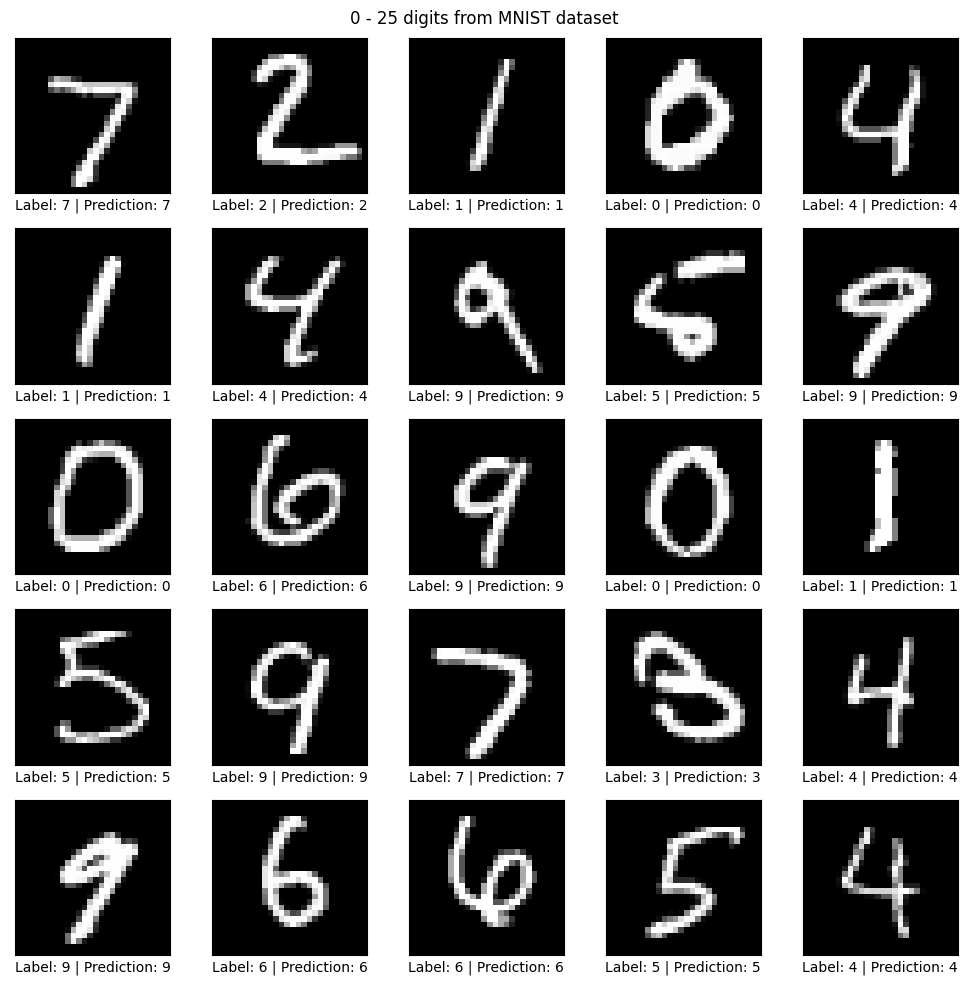

In [9]:
show_25_pred(
    test_images, 
    test_labels, 
    mlp_mnist.predict(test_images[0:25].reshape(-1, 784))
)

Text(113.9222222222222, 0.5, 'True labels')

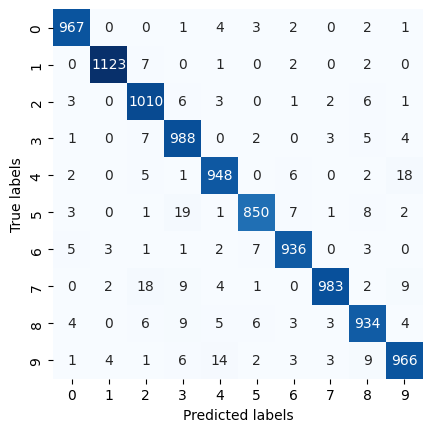

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = mlp_mnist.forward(test_images.reshape(-1, 784))
y_pred = np.argmax(y_pred, axis=1)

y_true = np.argmax(test_labels, axis=1)

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# False predictions

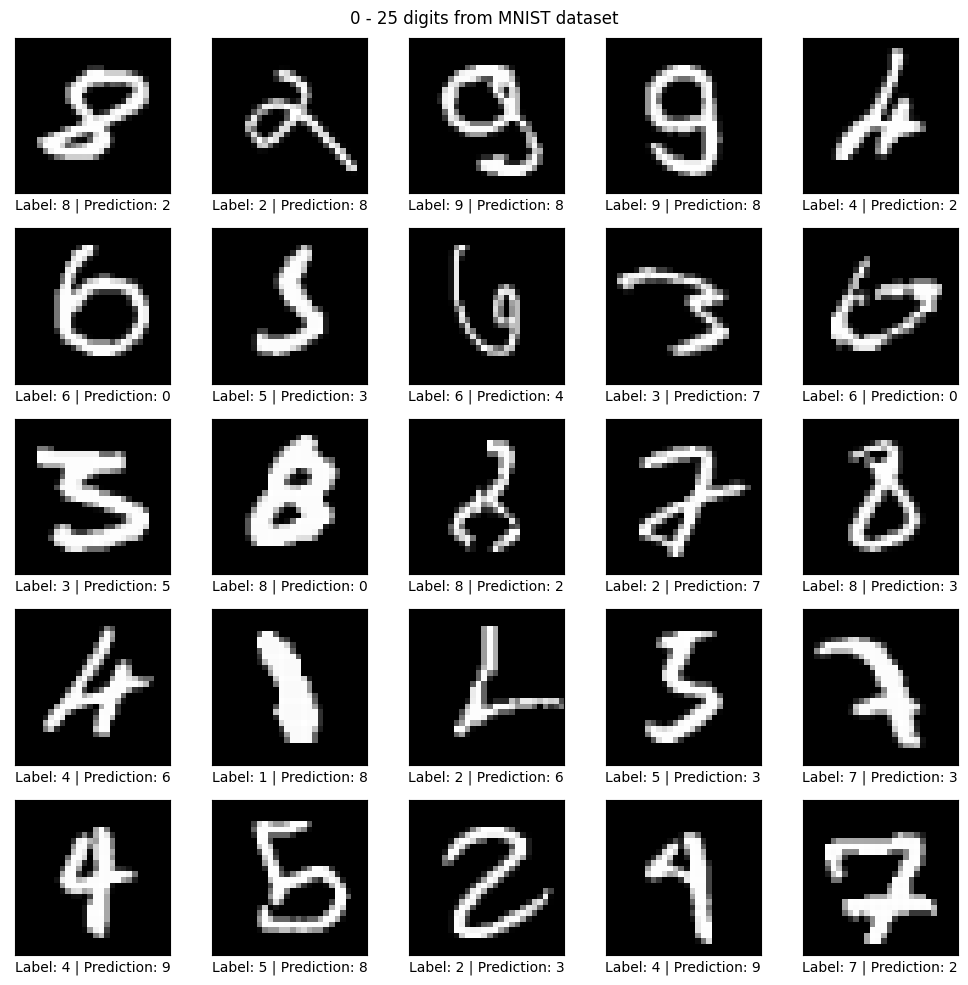

In [11]:
test_predictions = mlp_mnist.predict(test_images.reshape(-1, 784))

diff = test_predictions == test_labels.argmax(axis=1)

false_indexes = np.where(diff == False)[0]

test_false_predictions = test_images[false_indexes]
test_true_labels = test_labels[false_indexes]

show_25_pred(test_false_predictions, test_true_labels, test_predictions[false_indexes])

In [12]:
print(len(false_indexes), len(test_labels))

295 10000


# Testing on last hand written image

array([4], dtype=int64)

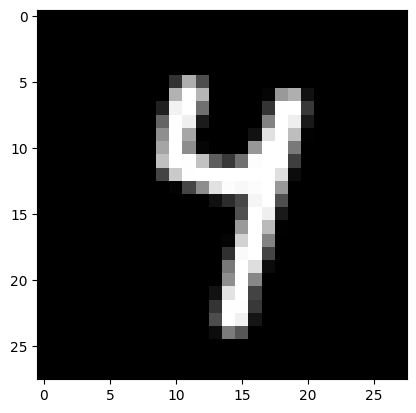

In [11]:
import cv2

img = cv2.imread('./draw-digit/drawing.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')

img = img / 255.0

img = img.reshape(-1, 784)

mlp_mnist.predict(img)

# Visualisation

# Trained MPL layer MNIST classification
since the number of input neurons is too high, it is impossible to show mnist mpl architecture as in previous form


# Biases

In [12]:
mlp_mnist_nne = NeuralNetworkExtractor(mlp_mnist)

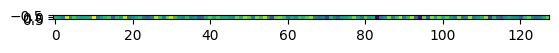

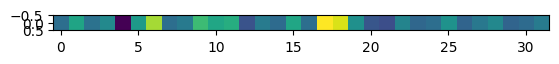

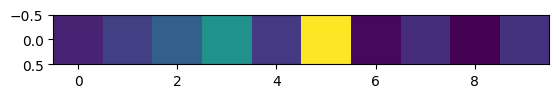

In [13]:
mlp_mnist_b= mlp_mnist_nne.get_biases()

plt.imshow(mlp_mnist_b[0])
plt.show()
plt.imshow(mlp_mnist_b[1])
plt.show()
plt.imshow(mlp_mnist_b[2])
plt.show()

# Weights


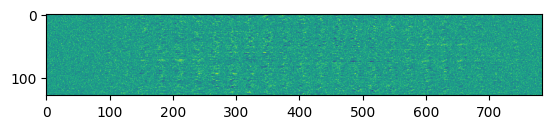

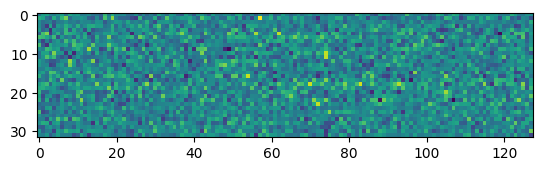

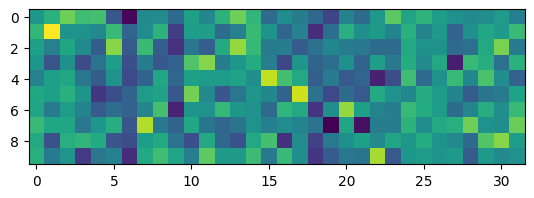

In [14]:
mlp_mnist_w = mlp_mnist_nne.get_weights()

plt.imshow(mlp_mnist_w[0].T)
plt.show()

plt.imshow(mlp_mnist_w[1].T)
plt.show()

plt.imshow(mlp_mnist_w[2].T)
plt.show()

# Outputs

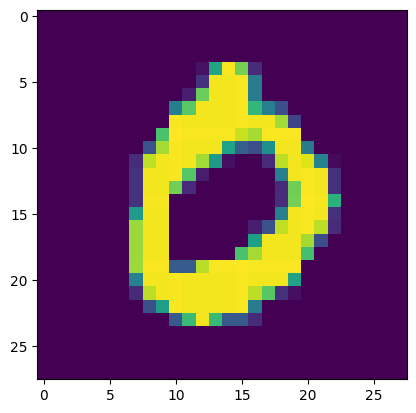

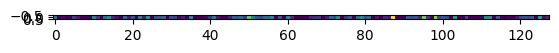

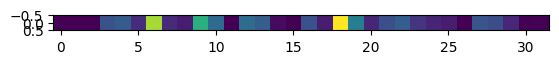

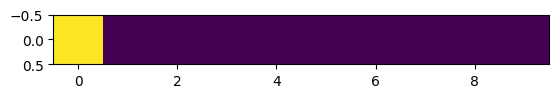

In [18]:
test_image = test_images[3]

plt.imshow(test_image, cmap='gray')

mlp_mnist_nne.forward(test_image.flatten())

layers_outputs = mlp_mnist_nne.get_layers_outputs()

plt.imshow(test_image)
plt.show()
plt.imshow(layers_outputs[0])
plt.show()
plt.imshow(layers_outputs[1])
plt.show()
plt.imshow(layers_outputs[2])
